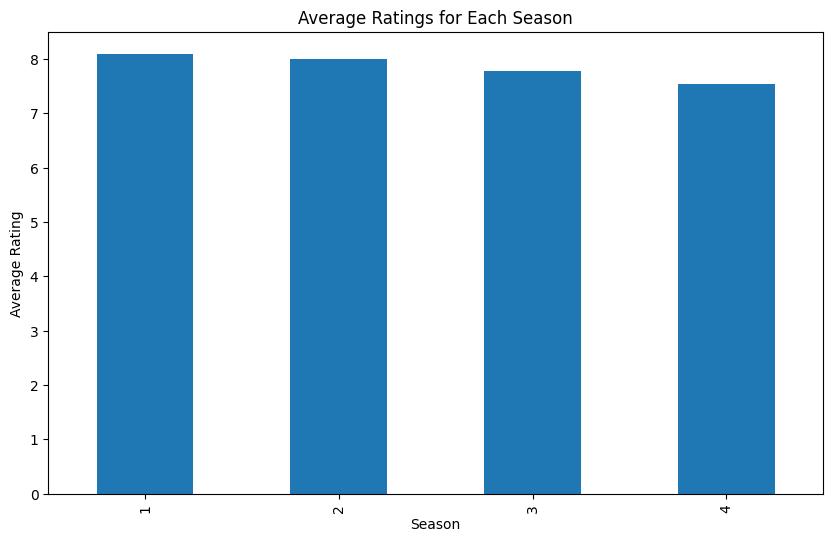

Episode names with average rating > 8 for each season:
0                 The Original
1                     Chestnut
2                    The Stray
3            Dissonance Theory
4                  Contrapasso
5                The Adversary
6                Trompe L'Oeil
7                  Trace Decay
8    The Well-Tempered Clavier
9           The Bicameral Mind
Name: Episode Name, dtype: object

Episode names that aired before May 2019:
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17            

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API and retrieve the data
response = requests.get(api_link)
data = response.json()

# Extract the required data attributes
episode_data = data['_embedded']['episodes']

# Create lists to store the extracted data
season = []
episode_numbers = []
rating = []
episode_name = []
airdate = []
summary = []

# Iterate over the episode data and extract the necessary attributes
for episode in episode_data:
    season.append(episode['season'])
    episode_numbers.append(episode['number'])
    rating.append(episode['rating']['average'])
    episode_name.append(episode['name'])
    airdate.append(episode['airdate'])
    summary.append(episode['summary'])

# Create a DataFrame using the extracted data attributes
data = pd.DataFrame({
    'Season': season,
    'Episode': episode_numbers,
    'Rating': rating,
    'Episode Name': episode_name,
    'Airdate': pd.to_datetime(airdate),
    'Summary': summary
})

# Get all the overall ratings for each season and compare them using a bar plot
plt.figure(figsize=(10, 6))
data.groupby('Season')['Rating'].mean().plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.show()

# Get all the episode names whose average rating is more than 8 for every season
highly_rated_episodes = data[data.groupby('Season')['Rating'].transform('mean') > 8]['Episode Name']

# Get all the episode names that aired before May 2019
aired_before_may_2019_episodes = data[data['Airdate'] < pd.to_datetime('2019-05-01')]['Episode Name']

# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = data.groupby('Season')['Rating'].idxmax().apply(lambda x: data.loc[x, 'Episode Name'])
lowest_rated_episodes = data.groupby('Season')['Rating'].idxmin().apply(lambda x: data.loc[x, 'Episode Name'])

# Get the summary for the most popular (highest ratings) episode in every season
most_popular_episodes_summary = data.groupby('Season')['Rating'].idxmax().apply(lambda x: data.loc[x, 'Summary'])

# Print the results
print("Episode names with average rating > 8 for each season:")
print(highly_rated_episodes)
print("\nEpisode names that aired before May 2019:")
print(aired_before_may_2019_episodes)
print("\nEpisode with the highest rating for each season:")
print(highest_rated_episodes)
print("\nEpisode with the lowest rating for each season:")
print(lowest_rated_episodes)
print("\nSummary for the most popular episode in each season:")
print(most_popular_episodes_summary)
